>>> File CSV berhasil dibaca.

>>> Ringkasan Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Post_ID           5000 non-null   object
 1   Platform          5000 non-null   object
 2   Hashtag           5000 non-null   object
 3   Content_Type      5000 non-null   object
 4   Region            5000 non-null   object
 5   Views             5000 non-null   int64 
 6   Likes             5000 non-null   int64 
 7   Shares            5000 non-null   int64 
 8   Comments          5000 non-null   int64 
 9   Engagement_Level  5000 non-null   object
dtypes: int64(4), object(6)
memory usage: 390.8+ KB
None

>>> Mengecek Data yang Hilang
Post_ID             0
Platform            0
Hashtag             0
Content_Type        0
Region              0
Views               0
Likes               0
Shares              0
Comments            0
Engag

/tmp/ipython-input-2327608623.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
/tmp/ipython-input-2327608623.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

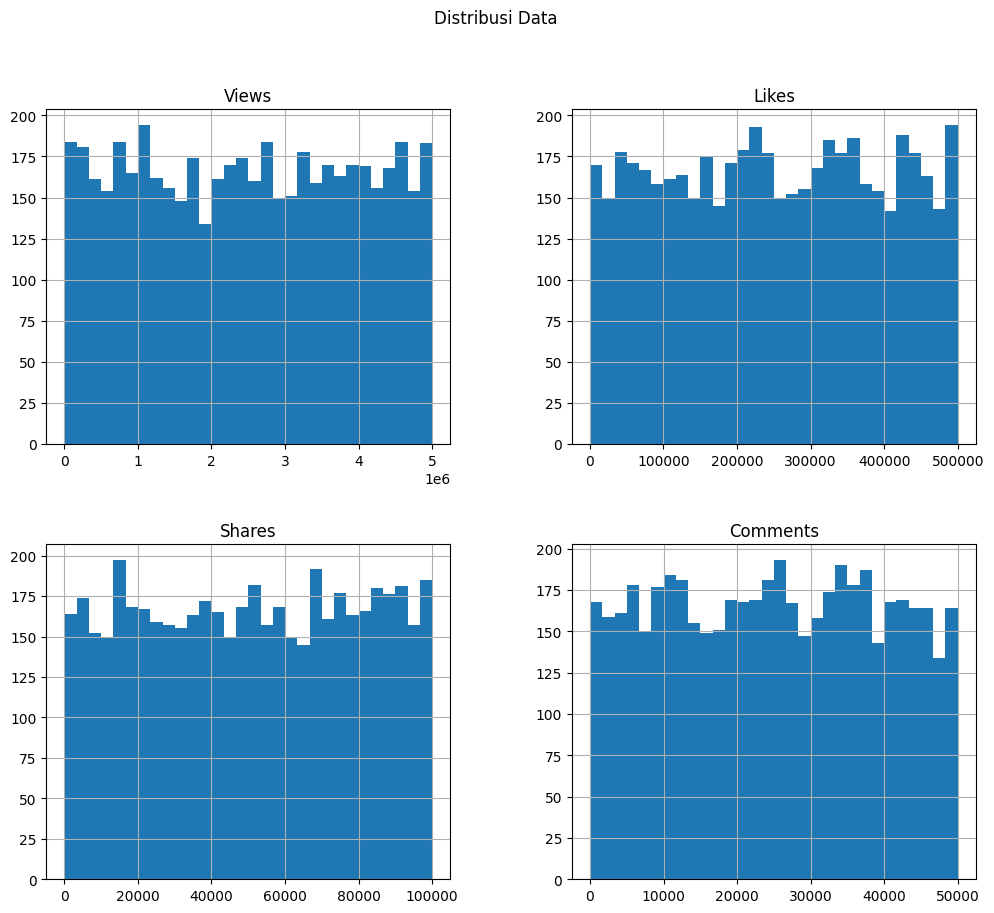

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Viral_Social_Media_Trends.csv')
print(">>> File CSV berhasil dibaca.")

print()
print('>>> Ringkasan Data')
print(df.info())

print()
print('>>> Mengecek Data yang Hilang')
print(df.isna().sum())

print()
print('>>> Cek Statistical Summary')
print(df.describe())

#Mengatasi missing value
for column in df.columns:
    if df[column].dtype == 'object':
        # Jika kolom bertipe object, isi dengan mode
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        # Jika kolom bertipe numerik, isi dengan mean
        df[column].fillna(df[column].mean(), inplace=True)

#Mengecek kembali missing value
print()
print('>>> Jumlah missing value setelah diatasi:')
print(df.isna().sum())
print()
print(df.info())

print()
print('\n>>> Mengecek jumlah data yang duplikat:')
check_duplicate = df.duplicated().sum()
print(f"Ada {check_duplicate} data duplikat.")
df=df.drop_duplicates()
handle_duplicate=df.duplicated().sum()
print(f"Data duplikat sudah diatasi, tersisa {handle_duplicate}.")

#Histogram distribusi
df.hist(figsize=(12, 10), bins=30)
plt.suptitle('Distribusi Data')
plt.show()